# Ford GoBike System Data
### by Mustafa Ihab

## Dataset Overview
The datasets provide information about a bike sharing system in US including information about the costumers, the time of the ride, the stations, and the duration

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [3]:
fordGoBike = pd.read_csv('fordgobike-tripdata.csv')

### Data Visualization:  Univariate Exploration

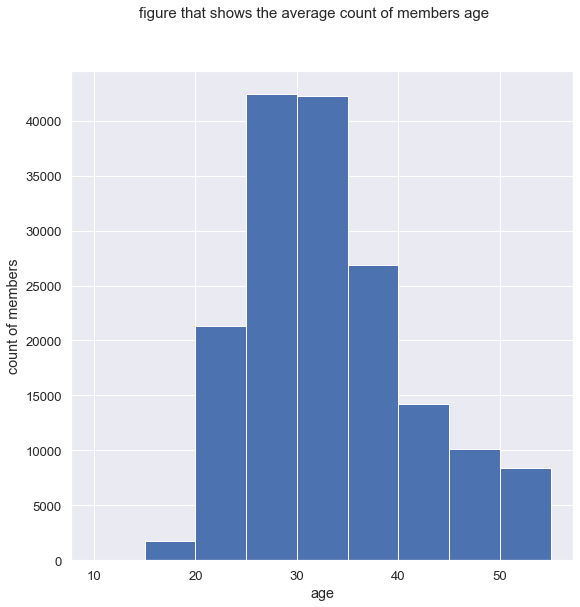

In [30]:
# Plot the age of the rider
plt.hist(fordGoBike['age'], bins = np.arange(10, fordGoBike['age'].max(), 5))
plt.suptitle("figure that shows the average count of members age",fontsize=15, fontdict={"weight": "bold"})
plt.ylabel('count of members');
plt.xlabel('age');

As expected the most common age of the riders are between 20 and 40 however there are members which are older than 100 year which in my opnion are not legit so for simplicity we only consider riders younger than 60 

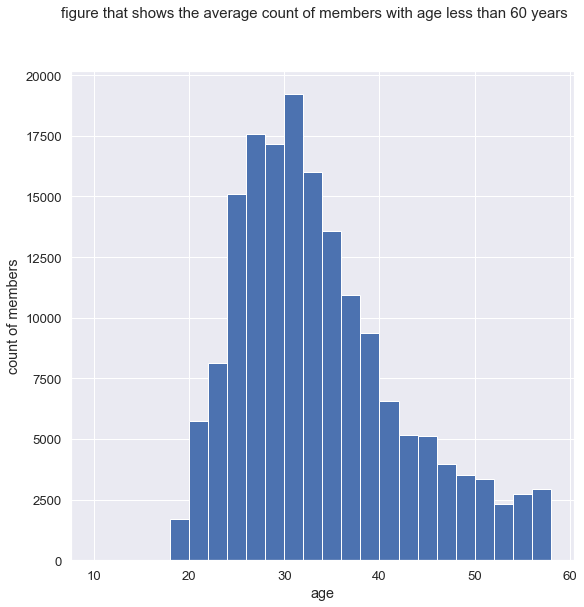

In [32]:
fordGoBike = fordGoBike.query('age < 60')
plt.hist(fordGoBike['age'], bins = np.arange(10, fordGoBike['age'].max(), 2))
plt.suptitle("figure that shows the average count of members with age less than 60 years",fontsize=15, fontdict={"weight": "bold"});
plt.ylabel('count of members');
plt.xlabel('age');

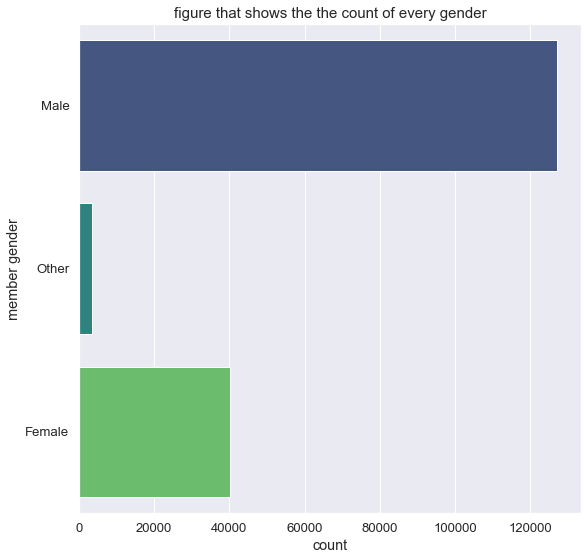

In [17]:
#Comparing the gender of the costumer
sb.countplot(data=fordGoBike, y='member_gender', palette='viridis').set_title("figure that shows the the count of every gender",size=15);
plt.ylabel('member gender');

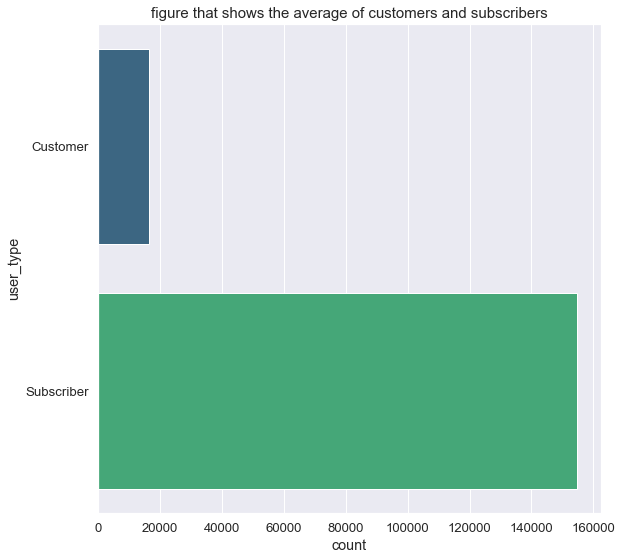

In [18]:
sb.countplot(data=fordGoBike, y='user_type', palette='viridis').set_title("figure that shows the average of customers and subscribers",size=15);

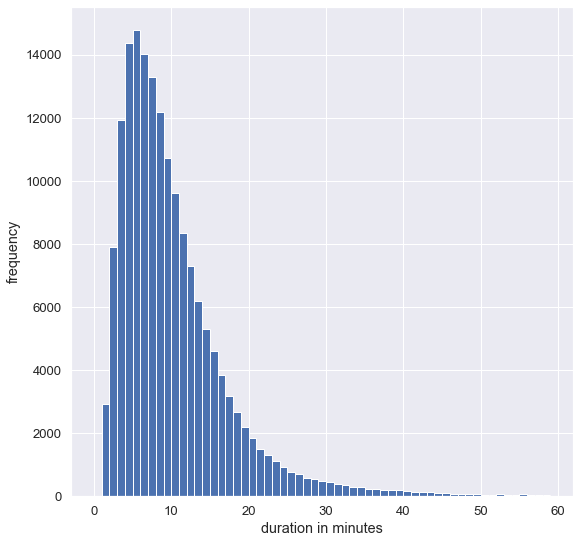

In [34]:
plt.hist(data=fordGoBike, x="duration_minute",bins=np.arange(0, 60, 1));
plt.ylabel('frequency');
plt.xlabel('duration in minutes');

#### as the Graphs showed the average age of riders are between 20 and 40 and that most of the riders are subscribed and males and that most of the trips time last between 5 and 10 minutes 

### Data Visualization:  Bivariate Exploration

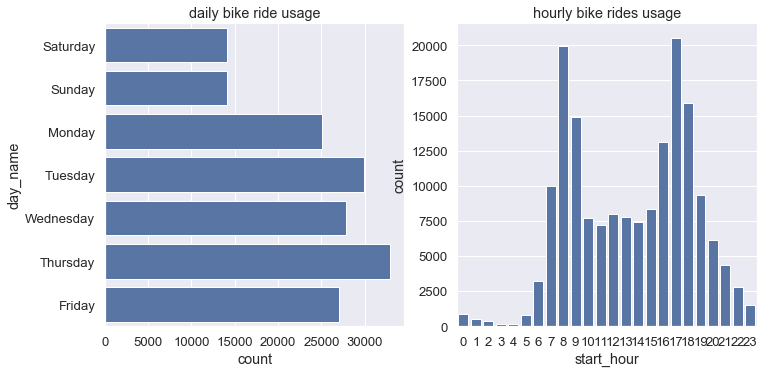

In [27]:
# Plotting the daily and hourly bike rides usage
fordGoBike['day_name'] = fordGoBike['start_time'].dt.day_name()

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
figure.tight_layout()

plt.subplot(1,2,1)
sb.countplot(data=fordGoBike, y='day_name', color = sb.color_palette()[0],
             order=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']).set_title('daily bike ride usage');

fordGoBike['start_hour'] = fordGoBike['start_time'].dt.hour

plt.subplot(1,2,2)
sb.countplot(data=fordGoBike, x='start_hour', color = sb.color_palette()[0]).set_title('hourly bike rides usage');

The bike sharing system mostly used in midweek from monday to friday in time of 7am to 10am and 4pm to 8pm

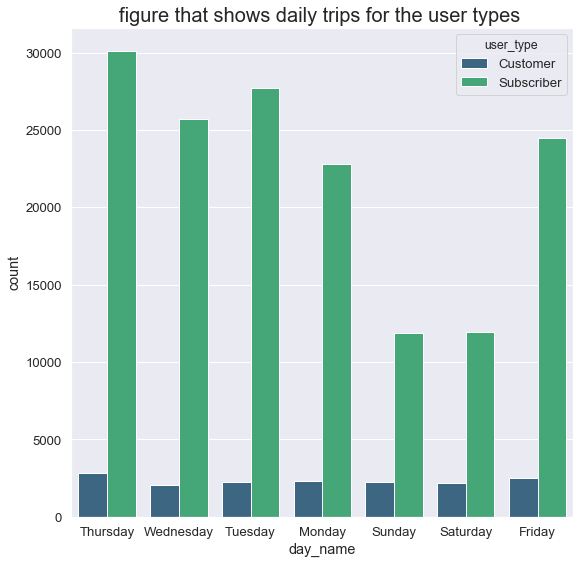

In [28]:
sb.countplot(x='day_name', data=fordGoBike, hue='user_type', palette='viridis').set_title("figure that shows daily trips for the user types ",size=20);

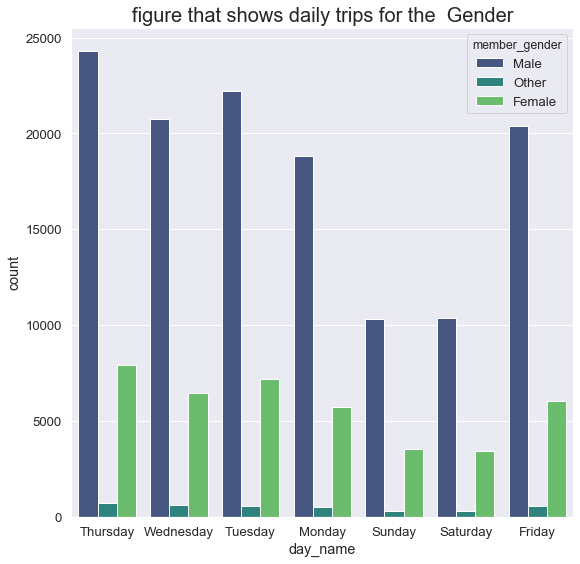

In [35]:
sb.countplot(x='day_name', data=fordGoBike, hue='member_gender', palette='viridis').set_title("figure that shows daily trips for the  Gender",size=20);

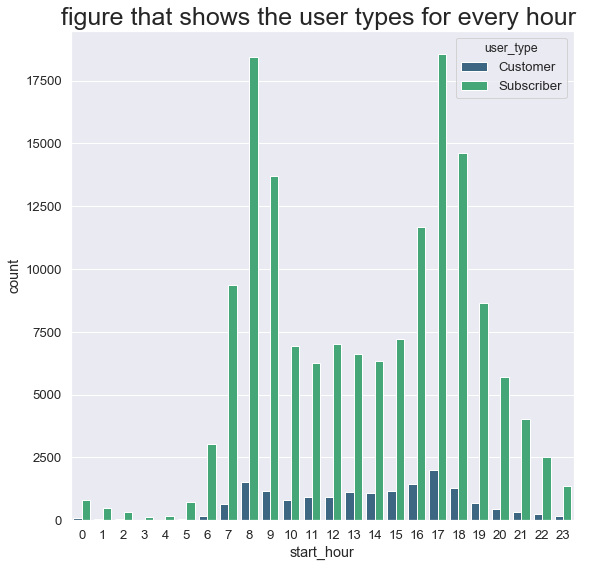

In [36]:
sb.countplot(x='start_hour', data=fordGoBike, hue='user_type', palette='viridis').set_title("figure that shows the user types for every hour ",size=25);

## Multivariate Exploration


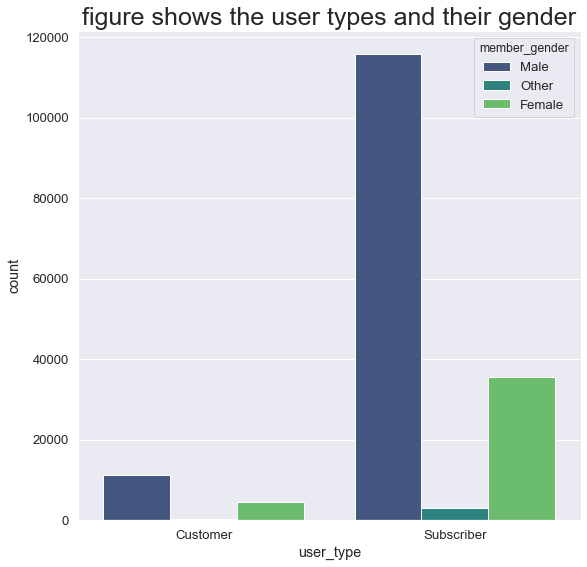

In [37]:
sb.countplot(x='user_type', data=fordGoBike, hue='member_gender', palette='viridis').set_title("figure shows the user types and their gender",size=25);

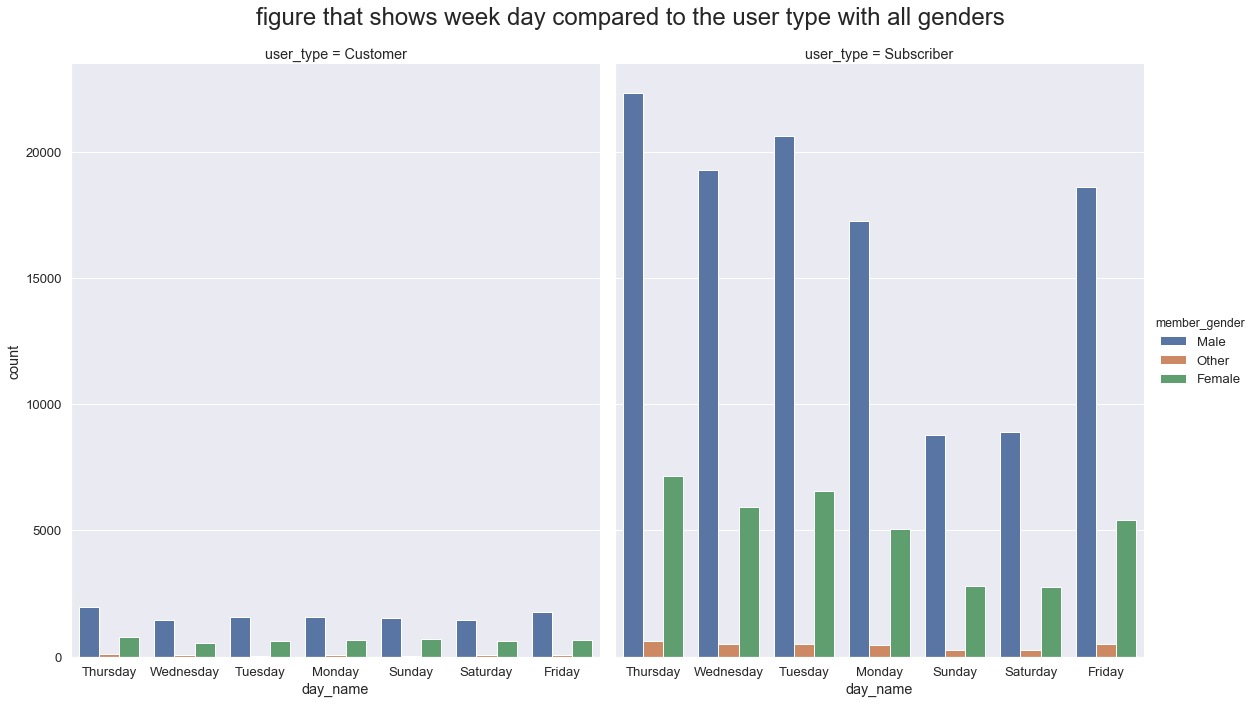

In [38]:
g = sb.catplot(x="day_name", hue="member_gender", col="user_type",
                data=fordGoBike, kind="count",
                height=10, aspect=0.8);
g.fig.suptitle("figure that shows week day compared to the user type with all genders",fontsize=24, fontdict={"weight": "bold"});
g.fig.subplots_adjust(top=.9)

In [39]:
df_corr = fordGoBike.corr()
df_corr

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age,duration_minute,start_hour
duration_sec,1.000000,-0.007402,0.012626,-0.041416,0.001809,0.013181,-0.041886,0.011199,-0.005636,0.005636,1.000000,0.006724
start_station_id,-0.007402,1.000000,-0.193586,0.463763,0.338344,-0.182505,0.471059,-0.069213,0.127936,-0.127936,-0.007402,0.011780
start_station_latitude,0.012626,-0.193586,1.000000,-0.681485,-0.182758,0.990271,-0.686960,0.051340,-0.089393,0.089393,0.012626,-0.018737
start_station_longitude,-0.041416,0.463763,-0.681485,1.000000,0.484798,-0.685990,0.992549,-0.145289,0.149770,-0.149770,-0.041416,0.053753
end_station_id,0.001809,0.338344,-0.182758,0.484798,1.000000,-0.200829,0.474367,-0.058837,0.126050,-0.126050,0.001809,0.092232
end_station_latitude,0.013181,-0.182505,0.990271,-0.685990,-0.200829,1.000000,-0.688494,0.050872,-0.089414,0.089414,0.013181,-0.035061
end_station_longitude,-0.041886,0.471059,-0.686960,0.992549,0.474367,-0.688494,1.000000,-0.147135,0.150502,-0.150502,-0.041886,0.034257
bike_id,0.011199,-0.069213,0.051340,-0.145289,-0.058837,0.050872,-0.147135,1.000000,0.027981,-0.027981,0.011199,0.014707
member_birth_year,-0.005636,0.127936,-0.089393,0.149770,0.126050,-0.089414,0.150502,0.027981,1.000000,-1.000000,-0.005636,0.064129
age,0.005636,-0.127936,0.089393,-0.149770,-0.126050,0.089414,-0.150502,-0.027981,-1.000000,1.000000,0.005636,-0.064129


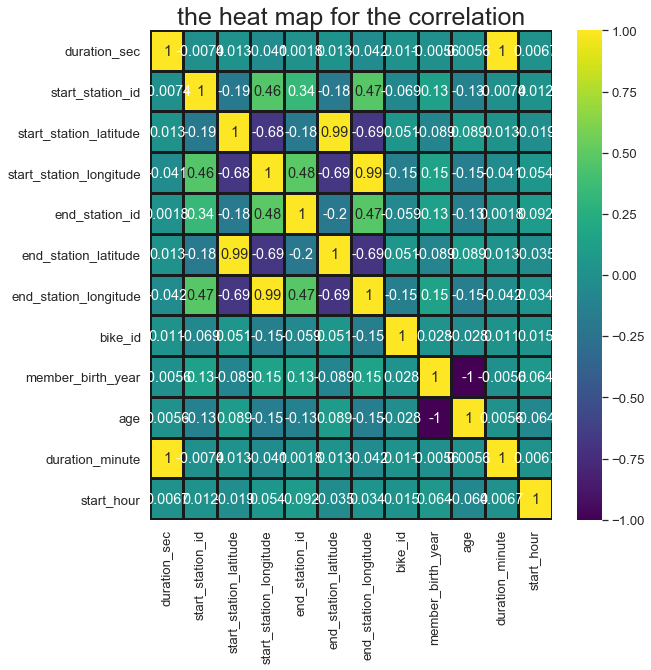

In [40]:
sb.heatmap(df_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True).set_title("the heat map for the correlation",size=25);